This is the preprocessing of data. After the data is cleaned we will start answering questions

In [57]:
#Importing required libraries
import nltk
from nltk.corpus import inaugural
from nltk.probability import FreqDist
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from collections import Counter
from nltk.corpus import stopwords

In [58]:
# Downloading NLTK resources
nltk.download('inaugural')
nltk.download('stopwords')
stop_words = stopwords.words('english')
print (stop_words)
additional_stopwords = ['us', 'upon', 'must']
stop_words.extend(additional_stopwords)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
del inaugural_cleaned_data


NameError: name 'inaugural_cleaned_data' is not defined

In [69]:
# Creating a DataFrame to store data
columns = ['President', 'Year', 'Party', 'Speech']
inaugural_cleaned_data = pd.DataFrame(columns=columns)

In [60]:
# Function to get party affiliation based on president's name
def get_party(president):
    democrats = ['Biden', 'Obama', 'Clinton', 'Carter', 'Johnson', 'Kennedy', 'Truman', 'Roosevelt', 'Wilson']
    republicans = ['Trump', 'Bush', 'Reagan', 'Ford', 'Nixon', 'Eisenhower', 'Hoover', 'Coolidge', 'Harding', 'Taft', 'McKinley', 'Harrison', 'Garfield', 'Arthur', 'Hayes', 'Grant', 'Lincoln']

    if president in democrats:
        return 'Democrat'
    elif president in republicans:
        return 'Republican'
    else:
        return 'Other'

In [ ]:
for fileid in inaugural.fileids():
    parts = fileid.split('-')
    president = parts[1].replace('.txt', '')
    year = fileid.split('-')[0]
    party = get_party(president)
    speech = ' '.join(inaugural.words(fileid))
    for char in '!#$%&@?,.:;+-*/=<>"\'()[\\]{|}~\n\t':
       speech = speech.replace(char, ' ')
    speech = speech.lower()
    listofwords = speech.split()
    words= len(listofwords)
    unq_words = len(set(listofwords))
    without_stp_words = [w for w in set(listofwords) if w not in stop_words] # unique words exclusive of stop words
    fll_wrd_lst = [w for w in listofwords if w not in stop_words] # non-unique words exclusive of stop words
    inaugural_cleaned_data = inaugural_cleaned_data.append({'President': president, 'Year': int(year), 'Party': party, 'Speech': speech, 'Totl_wrds': int(words), 'Vocabulary': int(unq_words), 'excl_stp_wrds': len(without_stp_words), 'excl_speech': fll_wrd_lst, 'excl_stpwrds': without_stp_words},  ignore_index=True)

print(inaugural_cleaned_data)




In [71]:
#Since there were two Bush we will name the first bush as Bush_Sr
inaugural_cleaned_data.loc[inaugural_cleaned_data['Year'] == 1989, 'President'] = 'Bush_Sr'
inaugural_cleaned_data

,President,Year,Party,Speech,Totl_wrds,Vocabulary,excl_stp_wrds,excl_speech,excl_stpwrds
0,Washington,1789,Other,fellow citizens of the senate and of the hou...,1431.0,594.0,506.0,"[fellow, citizens, senate, house, representati...","[distinct, cares, consistent, collect, frequen..."
1,Washington,1793,Other,fellow citizens i am again called upon by th...,135.0,90.0,56.0,"[fellow, citizens, called, voice, country, exe...","[thereof, subject, act, president, may, sense,..."
2,Adams,1797,Other,when it was first perceived in early times ...,2322.0,794.0,696.0,"[first, perceived, early, times, middle, cours...","[majesty, friendly, conventions, animosity, me..."
3,Jefferson,1801,Other,friends and fellow citizens called upon to u...,1732.0,679.0,587.0,"[friends, fellow, citizens, called, undertake,...","[peaceable, alliances, resulting, information,..."
4,Jefferson,1805,Other,proceeding fellow citizens to that qualifi...,2168.0,777.0,677.0,"[proceeding, fellow, citizens, qualification, ...","[friendly, surplus, outrages, service, prove, ..."
5,Madison,1809,Other,unwilling to depart from examples of the most ...,1177.0,521.0,436.0,"[unwilling, depart, examples, revered, authori...","[friendly, wretchedness, resulting, informatio..."
6,Madison,1813,Other,about to add the solemnity of an oath to the o...,1211.0,518.0,439.0,"[add, solemnity, oath, obligations, imposed, s...","[outrages, termination, service, second, chara..."
7,Monroe,1817,Other,i should be destitute of feeling if i was not ...,3378.0,980.0,883.0,"[destitute, feeling, deeply, affected, strong,...","[test, prayers, friendly, surplus, consistent,..."
8,Monroe,1821,Other,fellow citizens i shall not attempt to descr...,4482.0,1204.0,1100.0,"[fellow, citizens, shall, attempt, describe, g...","[majesty, prayers, distinct, modified, collect..."
9,Adams,1825,Other,in compliance with an usage coeval with the ex...,2917.0,963.0,867.0,"[compliance, usage, coeval, existence, federal...","[friendly, service, second, pledges, fruits, s..."


1. Which president has the most vocabulary as evident from their inaugural speeches, and which president has the least vocabulary? On average, do Democratic, Republican, or Other presidents have higher vocabulary? (2 points)

In [72]:
# Finding the maximum and minimum vocabulary
max_vocabulary_president = inaugural_cleaned_data.loc[inaugural_cleaned_data['Vocabulary'].idxmax(), 'President']
max_vocabulary_count = inaugural_cleaned_data['Vocabulary'].max()
min_vocabulary_president = inaugural_cleaned_data.loc[inaugural_cleaned_data['Vocabulary'].idxmin(), 'President']
min_vocabulary_count = inaugural_cleaned_data['Vocabulary'].min()

print("President with the maximum vocabulary:")
print("President:", max_vocabulary_president)
print("Max Vocabulary:", max_vocabulary_count)

print("\nPresident with the minimum vocabulary:")
print("President:", min_vocabulary_president)
print("Min Vocabulary:", min_vocabulary_count)

President with the maximum vocabulary:
President: Harrison
Max Vocabulary: 1800.0

President with the minimum vocabulary:
President: Washington
Min Vocabulary: 90.0


In [73]:
# Calculate average vocabulary for Democrats and Republicans
democrat_avg_vocabulary = inaugural_cleaned_data.groupby('Party')['Vocabulary'].mean()

# Print the results
print("Average Vocabulary for Democrats:", democrat_avg_vocabulary['Democrat'])
print("Average Vocabulary for Republicans:", democrat_avg_vocabulary['Republican'])
print("Average Vocabulary for Others:", democrat_avg_vocabulary['Other'])

Average Vocabulary for Democrats: 608.3125
Average Vocabulary for Republicans: 867.3333333333334
Average Vocabulary for Others: 764.4736842105264


2. Create a barplot of presidential vocabulary from the earliest president (Washington) to the latest (Biden) in chronological order. Color code this barplot as blue for Democrat, red for Republican, and gray for Others. (1 point)

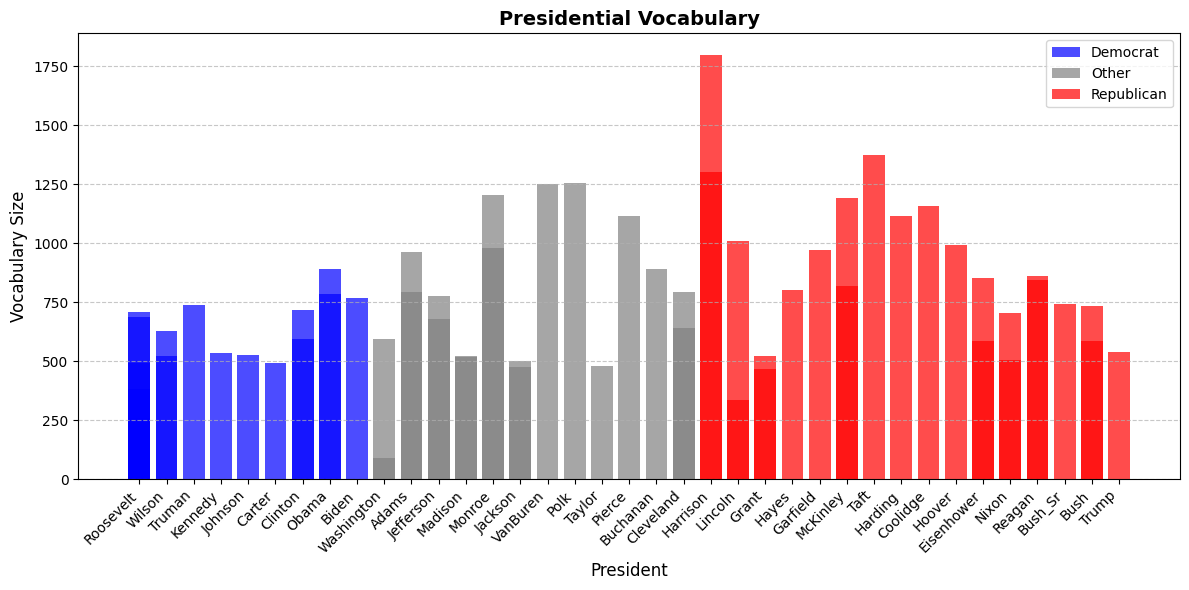

In [74]:
import matplotlib.pyplot as plt

# Sorting DataFrame by year
inaugural_cleaned_data_sorted = inaugural_cleaned_data.sort_values('Year')

# Color mapping
color_map = {'Democrat': 'blue', 'Republican': 'red', 'Other': 'gray'}

# Create a bar plot
plt.figure(figsize=(12, 6))

# Iterate over each party and plot their data separately
for party, group in inaugural_cleaned_data_sorted.groupby('Party'):
    plt.bar(group['President'], group['Vocabulary'], color=color_map[party], label=party, alpha=0.7)

# Customize plot aesthetics
plt.xlabel('President', fontsize=12)
plt.ylabel('Vocabulary Size', fontsize=12)
plt.title('Presidential Vocabulary', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a horizontal line at y=0 for better readability
plt.axhline(0, color='black', linewidth=0.5)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


3. What are the five most frequently used words (exclusive of stop words) used by each president? What are the five most frequently words used collectively by all Democratic presidents versus Republican presidents? (2 point)

In [76]:
#What are the five most frequently used words (exclusive of stop words) used by each president?


from collections import Counter

for index, row in inaugural_cleaned_data.iterrows():
    # Extracting president's name, year, and the list of words exclusive of stop words
    president_name = row['President']
    inauguration_year = row['Year']
    excl_stopwords = row['excl_speech']

    # Calculating word frequency using Counter
    word_count = Counter(excl_stopwords)

    # Getting the 5 most common words
    most_common_words = word_count.most_common(5)

    # Printing president's name, year, and the 5 most common words
    print("President:", president_name)
    print("Year:", inauguration_year)
    print("Most common words:", most_common_words)
    print()


President: Washington
Year: 1789
Most common words: [('every', 9), ('government', 8), ('public', 6), ('may', 6), ('citizens', 5)]

President: Washington
Year: 1793
Most common words: [('shall', 3), ('oath', 2), ('fellow', 1), ('citizens', 1), ('called', 1)]

President: Adams
Year: 1797
Most common words: [('people', 20), ('government', 16), ('may', 13), ('nations', 11), ('country', 10)]

President: Jefferson
Year: 1801
Most common words: [('government', 12), ('may', 8), ('fellow', 7), ('citizens', 7), ('let', 7)]

President: Jefferson
Year: 1805
Most common words: [('public', 14), ('citizens', 10), ('may', 10), ('fellow', 8), ('state', 8)]

President: Madison
Year: 1809
Most common words: [('nations', 6), ('public', 6), ('well', 5), ('country', 4), ('peace', 4)]

President: Madison
Year: 1813
Most common words: [('war', 15), ('country', 5), ('united', 5), ('every', 5), ('british', 5)]

President: Monroe
Year: 1817
Most common words: [('government', 22), ('great', 21), ('states', 21), (

In [77]:
#What are the five most frequently words used collectively by all Democratic presidents versus Republican presidents?
# Initialize counters for Democratic and Republican presidents
democratic_word_count = Counter()
republican_word_count = Counter()

# Iterate through the dataframe to count words used by each president based on their party affiliation
for index, row in inaugural_cleaned_data.iterrows():
    party_affiliation = row['Party']
    speech_words = row['excl_speech']  # List of non-unique words exclusive of stop words in the speech

    # Update word count based on party affiliation
    if party_affiliation == 'Democrat':
        democratic_word_count.update(speech_words)
    elif party_affiliation == 'Republican':
        republican_word_count.update(speech_words)

# Get the five most common words for Democratic presidents
top_democratic_words = democratic_word_count.most_common(5)

# Get the five most common words for Republican presidents
top_republican_words = republican_word_count.most_common(5)

# Print the results
print("Five most frequently used words by Democratic presidents:", top_democratic_words)
print("Five most frequently used words by Republican presidents:", top_republican_words)


Five most frequently used words by Democratic presidents: [('nation', 122), ('people', 121), ('world', 120), ('new', 109), ('america', 90)]
Five most frequently used words by Republican presidents: [('people', 298), ('government', 297), ('world', 195), ('great', 175), ('country', 171)]


4. What are the key themes (e.g., freedom, liberty, country, etc.) used by each president in their inaugural speech? (3 points)

In [78]:
# Define the key themes to analyze
themes = ['freedom', 'liberty', 'country', 'america', 'unity', 'progress', 'democracy']

# Function to count occurrences of themes in a speech
def count_theme_occurrences(text, theme):
    """
    Count the occurrences of a theme in a given text.

    Args:
    - text (str): The text to search for theme occurrences.
    - theme (str): The theme to search for in the text.

    Returns:
    - int: The number of occurrences of the theme in the text.
    """
    return text.lower().count(theme)

# Iterate through each president's speech and count occurrences of themes
for president, speech in zip(inaugural_cleaned_data['President'], inaugural_cleaned_data['Speech']):
    theme_counts = {theme: count_theme_occurrences(speech, theme) for theme in themes}
    print("Themes in", president, "speech:", theme_counts)



Themes in Washington speech: {'freedom': 0, 'liberty': 1, 'country': 5, 'america': 2, 'unity': 0, 'progress': 0, 'democracy': 0}
Themes in Washington speech: {'freedom': 0, 'liberty': 0, 'country': 1, 'america': 1, 'unity': 0, 'progress': 0, 'democracy': 0}
Themes in Adams speech: {'freedom': 0, 'liberty': 3, 'country': 10, 'america': 8, 'unity': 0, 'progress': 0, 'democracy': 0}
Themes in Jefferson speech: {'freedom': 4, 'liberty': 3, 'country': 4, 'america': 0, 'unity': 0, 'progress': 0, 'democracy': 0}
Themes in Jefferson speech: {'freedom': 2, 'liberty': 3, 'country': 4, 'america': 1, 'unity': 0, 'progress': 1, 'democracy': 0}
Themes in Madison speech: {'freedom': 1, 'liberty': 2, 'country': 4, 'america': 0, 'unity': 0, 'progress': 1, 'democracy': 0}
Themes in Madison speech: {'freedom': 0, 'liberty': 0, 'country': 5, 'america': 1, 'unity': 1, 'progress': 2, 'democracy': 0}
Themes in Monroe speech: {'freedom': 0, 'liberty': 0, 'country': 9, 'america': 1, 'unity': 3, 'progress': 1, 

5. Compute a sentiment (positive/negative) for each presidential speech, and draw a barplot of the sentiment of all presidential speeches in chronological order. Again, color code the speeches as blue for Democrat, red for Republican, and gray for Other. Which of these groups have higher mean sentiment score? Who are the top three presidents with the highest positive sentiment in each group? (2 points)

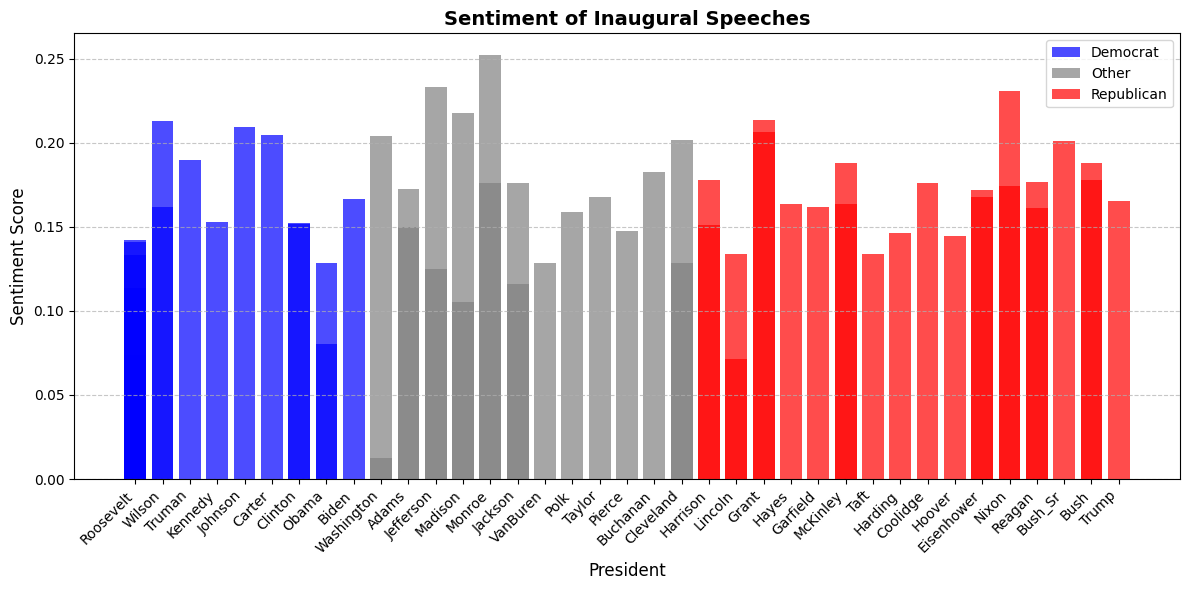

Mean Sentiment Score by Party:
 Party
Democrat      0.150806
Other         0.160745
Republican    0.168583
Name: Sentiment, dtype: float64

Top 3 Democrats with highest positive sentiment:
   President  Sentiment
32    Wilson   0.212831
44   Johnson   0.209227
47    Carter   0.204241

Top 3 Republicans with highest positive sentiment:
   President  Sentiment
46     Nixon   0.230924
20     Grant   0.213383
21     Grant   0.206539


In [80]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Define function to compute sentiment score
def compute_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Compute sentiment score for each speech
inaugural_cleaned_data['Sentiment'] = inaugural_cleaned_data['Speech'].apply(compute_sentiment)

# Plot sentiment of all speeches
plt.figure(figsize=(12, 6))
for party, group in inaugural_cleaned_data.groupby('Party'):
    plt.bar(group['President'], group['Sentiment'], color=color_map[party], label=party, alpha=0.7)  # Add transparency
plt.xlabel('President', fontsize=12)
plt.ylabel('Sentiment Score', fontsize=12)
plt.title('Sentiment of Inaugural Speeches', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.tight_layout()
plt.show()

# Compute mean sentiment score by party
mean_sentiment_by_party = inaugural_cleaned_data.groupby('Party')['Sentiment'].mean()
print("Mean Sentiment Score by Party:\n", mean_sentiment_by_party)

# Find top three presidents with highest positive sentiment in each group
top_demo = inaugural_cleaned_data[inaugural_cleaned_data['Party'] == 'Democrat'].nlargest(3, 'Sentiment')
top_repub = inaugural_cleaned_data[inaugural_cleaned_data['Party'] == 'Republican'].nlargest(3, 'Sentiment')

print("\nTop 3 Democrats with highest positive sentiment:")
print(top_demo[['President', 'Sentiment']])
print("\nTop 3 Republicans with highest positive sentiment:")
print(top_repub[['President', 'Sentiment']])

# Save the DataFrame to a CSV file
inaugural_cleaned_data.to_csv('inaugural_cleaned_data.csv', index=False)


